<a href="https://colab.research.google.com/github/flat35hd99/report_magnetical_material/blob/master/20200514magnetical_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 希土類元素Tb,Dy,Ho,Er,Tmの磁化測定  
氏名　杉浦航  
学籍番号　061800882  
希土類元素Tb,Dy,Ho,Er,Tmの磁化率の温度依存性($\frac{M}{H}$ vs T )・磁化の磁場依存性(M-Hcurve)を調べる。この実験では$\frac{dM}{dH}$ではなく$\frac{M}{H}$を磁化率（線形磁化率）とする。  
以下の処理は今後プログラムする上で必要になる処理である。numpyは多次元配列の処理に優れているライブラリ、matplotlibは図形描画を行うpython版gnuplotのようなライブラリである。なお、このレポートはGoogle Colabを利用して作成・実行した。Google colabはjupyter notebookをベースにしたpythonの実行環境である。



In [0]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

dirPath = "/content/drive/My Drive/Colab Notebooks/Data_Magnetism/"
experiment_alpha = 4.228 * 10**2 # 第二回で求めたこの実験系でのα

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 問題（１）
室温と液体窒素温度におけるTb,Dy,Ho,Er,Tmの磁化の磁場依存性の測定データを使用してモル磁化M(emu/mol)を磁場H(Oe)に対してプロットしたグラフを作成せよ。  
Tb 質量:0.2105、式量:158.93 g/mol  
Dy 質量:0.1052、式量:162.05 g/mol  
Ho 質量:0.1374、式量:164.93 g/mol  
Er 質量:0.1338、式量:167.26 g/mol  
Tm 質量:0.1308、式量:168.93 g/mol  
## 回答
同じ処理を複数回するので、DataModuleクラスを定義して、H-Mカーブを簡単にプロットできるようにした。プロットの結果は下記の通りである。

--- substance: Tb ---
when T = 300K
max = 754.6337665368171
min = -747.2917290451308
when T = 77K
max = 22664.55051781473
min = -22405.98311049881 

--- substance: Dy ---
when T = 300K
max = 467.61961330798476
min = -476.0862636882129
when T = 77K
max = 20893.088015209123
min = -20775.857471482886 

--- substance: Ho ---
when T = 300K
max = 317.19616084425036
min = -323.28632713246
when T = 77K
max = 1766.1482235807862
min = -1816.899609315866 

--- substance: Er ---
when T = 300K
max = 211.99402452017935
min = -214.84809515695065
when T = 77K
max = 1297.0165449327353
min = -1287.6615356233183 

--- substance: Tm ---
when T = 300K
max = 129.19590754128438
min = -129.85116996330274
when T = 77K
max = 568.2763354954128
min = -571.0612007889907 



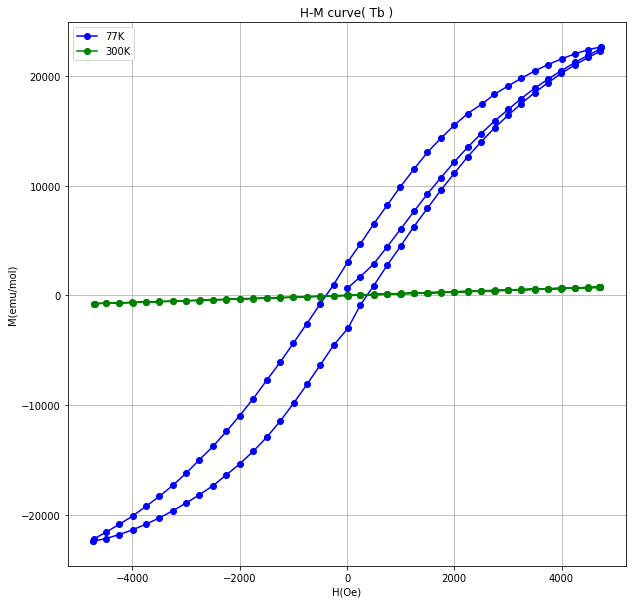

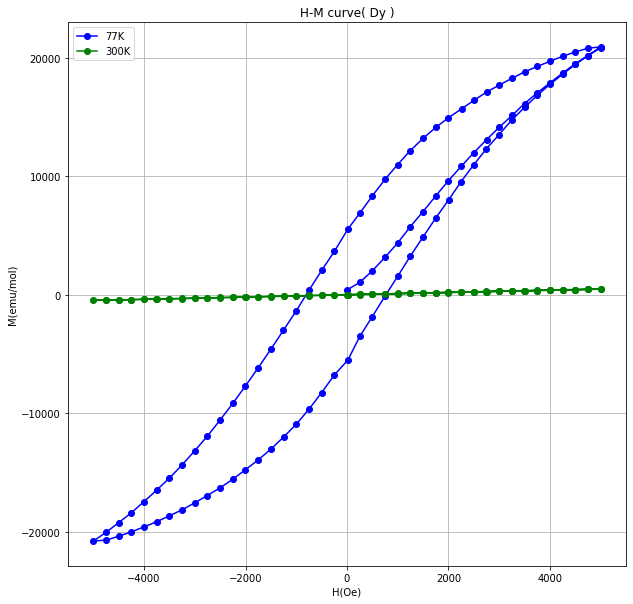

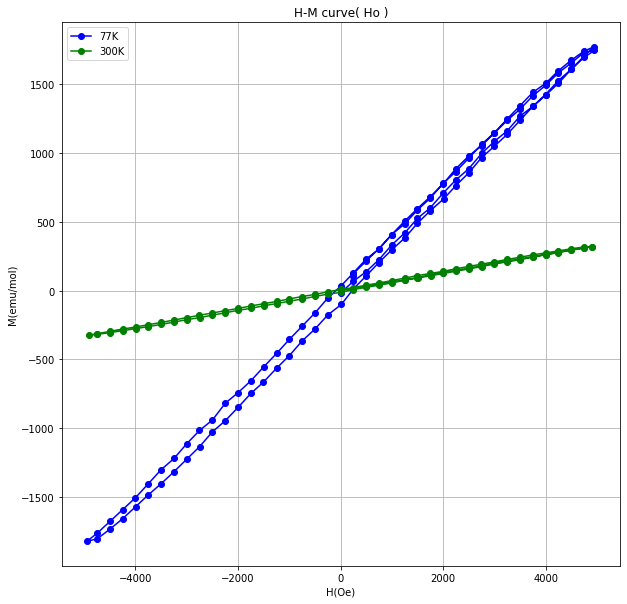

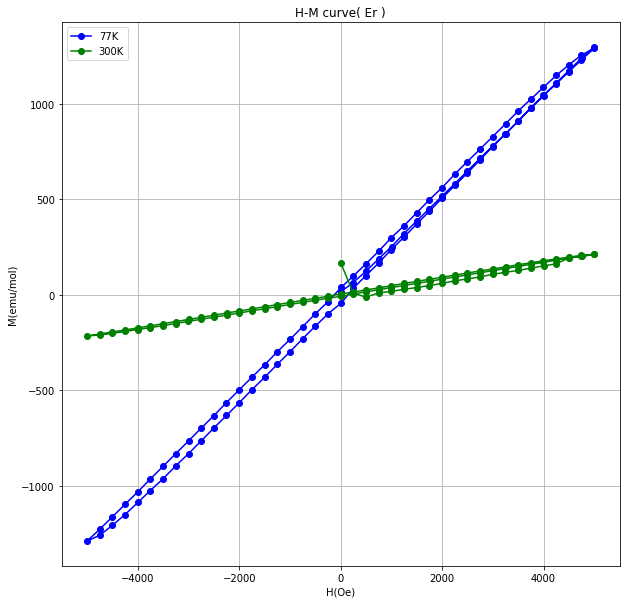

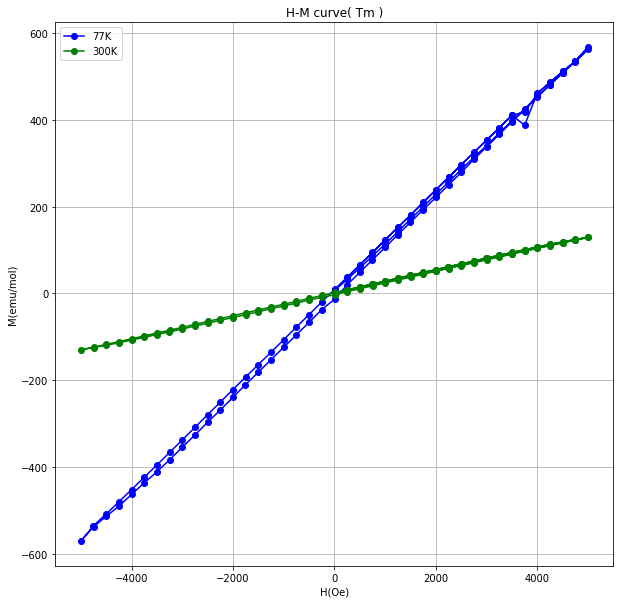

In [0]:

"""
(dirPath, substance_name, sample_mass, formula_weight)を引数に取る。
dirPath: データの格納してあるディレクトリへのパス
substance_name: 保存してあるディレクトリの名前。物質名。
sample_mass: 実験に使用した試料の質量 [g]
formula_weight: 試料の式量 [g/mol]
"""
class DataModule:
    
    substance_name = ''

    # T = 300 Kの一定温度で実験したときのデータ
    H_300K = []
    V_300K = []
    molar_magnetization_300K = []

    # T = 77 Kの一定温度で実験したときのデータ
    H_77K = []
    V_77K = []
    molar_magnetization_77K = []

    # H = 5000 Oeの一定磁場で実験したときのデータ
    H_5000_Oe = []
    T_5000_Oe = []
    V_5000_Oe = []
    
    def __init__(self, dirPath, substance_name, sample_mass, formula_weight):
        self.substance_name = substance_name

        self.H_300K, self.V_300K = np.loadtxt(dirPath + substance_name + '/M-H_' + substance_name + '_300K.txt', skiprows=1, unpack=True, usecols=[0,2])
        self.H_77K, self.V_77K = np.loadtxt(dirPath + substance_name + '/M-H_' + substance_name + '_77K.txt', skiprows=1, unpack=True, usecols=[0,2])
        self.H_5000_Oe, self.T_5000_Oe, self.V_5000_Oe = np.loadtxt(dirPath + substance_name + '/M-T_' + substance_name + '.txt', skiprows=1, unpack=True)

        sample_amount_of_substance = sample_mass / formula_weight
        self.molar_magnetization_300K = (experiment_alpha / sample_amount_of_substance) * self.V_300K
        self.molar_magnetization_77K = (experiment_alpha / sample_amount_of_substance) * self.V_77K

    def draw_mh_curve(self):
        fig = plt.figure(figsize = (10,10))
        ax = fig.add_subplot(111)
        c1, c2 = "blue", "green" #プロットの色指定
        l1, l2 = "77K", "300K" # ラベルの名前指定
        # 軸ラベル指定
        ax.set_xlabel('H(Oe)')
        ax.set_ylabel('M(emu/mol)')
        ax.set_title('H-M curve( ' + self.substance_name + ' )')
        ax.grid() # 罫線を表示
        ax.plot(self.H_77K, self.molar_magnetization_77K, 'o-', color=c1, label=l1)
        ax.plot(self.H_300K,self.molar_magnetization_300K, 'o-', color=c2, label=l2)
        ax.legend(loc=0) # 凡例の表示
    
    def printMaxMinMolarMagnization(self):
        print("--- substance:",self.substance_name,"---")
        print("when T = 300K")
        print("max =",np.max(self.molar_magnetization_300K))
        print("min =",np.min(self.molar_magnetization_300K))
        print("when T = 77K")
        print("max =",np.max(self.molar_magnetization_77K))
        print("min =",np.min(self.molar_magnetization_77K),"\n")

Tb = DataModule(dirPath, 'Tb', 0.2105, 158.93)
Dy = DataModule(dirPath, 'Dy', 0.1052, 162.05)
Ho = DataModule(dirPath, 'Ho', 0.1374, 164.93)
Er = DataModule(dirPath, 'Er', 0.1338, 167.26)
Tm = DataModule(dirPath, 'Tm', 0.1308, 168.93)

Tb.printMaxMinMolarMagnization()
Tb.draw_mh_curve()
Dy.printMaxMinMolarMagnization()
Dy.draw_mh_curve()
Ho.printMaxMinMolarMagnization()
Ho.draw_mh_curve()
Er.printMaxMinMolarMagnization()
Er.draw_mh_curve()
Tm.printMaxMinMolarMagnization()
Tm.draw_mh_curve()

# 問題（２）
室温と液体窒素温度におけるTb,Dy,Ho,Er,Tmの磁化の磁場依存性を比較し、磁化率の温度依存性も参考にして、磁化の磁場依存性の特徴から、液体窒素温度におけるTb,Dy,Ho,Er,Tmの磁気状態（磁性）を推定せよ。
## 回答


# 問題（３）
磁場H= 5000 (Oe)を印可して測定したTb,Dy,Ho,Er,TmのM/H（線形磁化率）の温度依存性の測定デー
タを使用してモル磁化率M/H(emu/mol)を温度T(K)に対してプロットしたグラフを作成せよ。
降温時に磁化率が急激に増大する温度（Gdの磁化率の温度依存性のグラフの変曲点）から磁気相転移温度（T<sub>C</sub> = (g<sub>J</sub> - 1）<sup>2</sup> |J<sub>eff</sub>|J(J+1)/3k<sub>B</sub> : キュリー温度）、降温時に磁化率の増大が変化（ピーク、キンクが出
現）する温度から反強磁性・らせん磁性転移温度（T<sub>N</sub> = (g<sub>J</sub> - 1 )<sup>2</sup> |J<sub>eff</sub>|J(J+1)/3k<sub>B</sub> : ネール温度) を求めよ。
## 回答

# 問題（４）
Tb,Dy,Ho,Er,Tmの磁化率の逆数（逆帯磁率χ<sup>-1</sup> ）の温度依存性をプロットしたグラフを作成せよ。  
Tb,Dy,Ho,Er,Tmの磁気相転移温度以上の温度領域（常磁性領域）でキュリー・ワイス則(χ<sup>-1</sup> = H/M = (T - T<sub>θ</sub>/C, C: キュリー定数）を用いてデータを解析（fitting）を行い、有効磁子数（𝑝eff = 𝑔𝐽 𝐽(𝐽 + 1) ≅ 8𝐶 ）とワイス温度（𝑇𝜃 = 𝑔𝐽 − 1 2𝐽eff𝐽(𝐽 + 1)/3𝑘B）を求めよ。